In [1]:
cd /mnt/Sdrive/SCIENCE-BIO-BRSDriveCircularVision/Judith/Projects/CRC

/mnt/Sdrive/SCIENCE-BIO-BRSDriveCircularVision/Judith/Projects/CRC


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('RNA_Seq/ecDNAcontaining_differentiallyexpressedgenes.tsv',sep='\t')

In [4]:
df['foldchange'] = -1*df['foldchange']

In [5]:
df

,genename,sample,foldchange,basemean,pvalue,p-adj,TTcircle
0,A1CF,CRCtx033,-0.856265,230.244793,0.416121,0.994326,CRCt-033:A1CF
1,A2M,CRCtx021,1.089236,1316.364157,0.252463,0.998235,CRCt-021:A2M
2,A2M,CRCtx047,0.009218,1370.400861,0.992264,0.999907,CRCt-047:A2M
3,A2M,CRCtx030,2.572536,1297.468782,0.007112,0.828031,CRCt-030:A2M
4,A2M-AS1,CRCtx021,0.385491,5.470580,0.785108,0.998235,CRCt-021:A2M-AS1
...,...,...,...,...,...,...,...
57541,ZXDC,CRCtx039,-0.238246,220.113799,0.474467,0.998272,CRCt-039:ZXDC
57542,ZZZ3,CRCtx021,0.853403,139.852468,0.059232,0.998235,CRCt-021:ZZZ3
57543,ZZZ3,CRCtx027,0.000628,145.100994,0.998847,0.999893,CRCt-027:ZZZ3
57544,ZZZ3,CRCtx033,0.944480,140.277156,0.036590,0.994326,CRCt-033:ZZZ3


In [6]:
df['pvalue'] =-np.log10(df['pvalue'])

In [7]:
onco = pd.read_csv('Miscellaneous/Oncogenes_tumorsuppressors.TSV',sep='\t',index_col=0)

In [8]:
for i in df.index:
    g = df.loc[i,'genename']
    if g in onco.index:
        df.loc[i,'Status'] = 'Oncogene'
    else:
        df.loc[i,'Status'] = 'NOT'

/tmp/ipykernel_1733/3390288308.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Oncogene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i,'Status'] = 'Oncogene'


In [13]:
df = df[df['foldchange'] >2]
df

,genename,sample,foldchange,basemean,pvalue,p-adj,TTcircle,Status
6307,CDK1,CRCtx021,3.075882,42.915674,1.379239,0.998235,CRCt-021:CDK1,Oncogene
6363,CDK7,CRCtx021,2.699990,32.625445,1.923469,0.998235,CRCt-021:CDK7,Oncogene
47526,SNORA74C-2,CRCtx021,2.226951,0.615412,0.279985,0.998235,CRCt-021:SNORA74C-2,NOT
47533,SNORA74D,CRCtx021,2.277564,20.142915,1.381107,0.998235,CRCt-021:SNORA74D,NOT
32604,MIR7845,CRCtx021,2.351856,0.667083,0.350634,0.998235,CRCt-021:MIR7845,NOT
...,...,...,...,...,...,...,...,...
53748,TRO,CRCtx055,3.128783,11.727851,1.176190,NaN,CRCt-055:TRO,NOT
4002,BTBD9-AS1,CRCtx055,3.429715,2.538998,0.850535,NaN,CRCt-055:BTBD9-AS1,NOT
43511,RPS7P5,CRCtx055,3.075063,1.955410,0.729888,NaN,CRCt-055:RPS7P5,NOT
48118,SNORD116-21,CRCtx055,4.284523,4.648118,0.870987,NaN,CRCt-055:SNORD116-21,NOT


In [33]:
rf = pd.read_csv('eccDNA/Number_of_circleswithgenes.tsv',sep='\t',index_col=4)

In [54]:
rf

,normal_id,tumor_id
CRCtx026,1640,0
CRCtx031,334,608
CRCtx050,63,1945
CRCtx046,736,2326
CRCtx024,22,2738
CRCtx022,0,2811
CRCtx029,2415,3178
CRCtx053,651,3301
CRCtx034,660,3446
CRCtx032,1676,3862


In [50]:
rf =rf.drop(['Nat','Tt'],axis=1)

In [51]:
merged_df = pd.merge(df, rf, left_on='sample', right_on=rf.index)

In [65]:
df =merged_df.sort_values(by=['tumor_id','normal_id'],ascending=True)

In [66]:
samples = df['sample'].unique()

/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

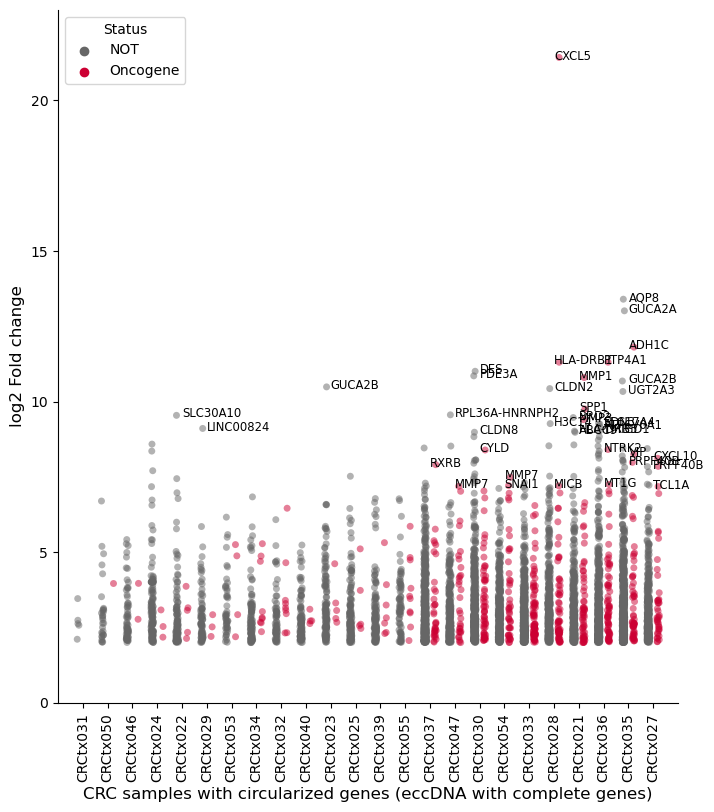

In [69]:
cmap = ['#666666','#CC0033']
fig, ax = plt.subplots(1, 1, figsize=(8,9))
# plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = sns.stripplot(data= df, y = df['foldchange'], x =df['sample'], s= 5, hue = 'Status', palette=cmap, alpha=0.5, dodge=True)
ax.set_xticklabels(samples, rotation=90, fontsize=10)
ax.set_xlim(-1, len(samples))
ax.set_ylim(0, 23)
plot_vals = df.copy()
up = plot_vals[plot_vals.foldchange > 3]
uponc = plot_vals[plot_vals.Status =='Oncogene']
df2 = uponc.sort_values(by=['foldchange'], ascending=False)[:20]
for i in df2.index:
    plt.text(y=df2.loc[i,'foldchange']+0.05, x=df2.loc[i,'sample'], s=df2.loc[i,'genename'], va='center', fontsize='small',)

upoth = plot_vals[plot_vals.Status !='Oncogene']
df3 = upoth.sort_values(by=['foldchange'], ascending=False)[:20]
for i in df3.index:
    plt.text(y=df3.loc[i,'foldchange']+0.05, x=df3.loc[i,'sample'], s=df3.loc[i,'genename'], va='center', fontsize='small',)

ax.set_xlabel("CRC samples with circularized genes (eccDNA with complete genes)", fontsize=12)
ax.set_ylabel("log2 Fold change", fontsize=12)
plt.savefig('RNA_Seq/Figures/DE_circularizedgenes_persample_stripplot_Supplementary.pdf',bbox_inches='tight',dpi=300)
plt.show()
